#hiearchical clustering

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler


In [4]:
crime=pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
crime.describe(include='all')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
count,50,50.00000,50.000000,50.000000,50.000000
unique,50,NaN,NaN,NaN,NaN
top,Alabama,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,7.78800,170.760000,65.540000,21.232000
std,NaN,4.35551,83.337661,14.474763,9.366385
min,NaN,0.80000,45.000000,32.000000,7.300000
25%,NaN,4.07500,109.000000,54.500000,15.075000
50%,NaN,7.25000,159.000000,66.000000,20.100000
75%,NaN,11.25000,249.000000,77.750000,26.175000


In [6]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
crime.rename(columns={'Unnamed: 0': 'region'}, inplace=True)
crime

,region,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [9]:
normalize = MinMaxScaler()
df = normalize.fit_transform(crime.iloc[:, 1:].to_numpy())
df1 = pd.DataFrame(df, columns = crime.columns[1:])
df1

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


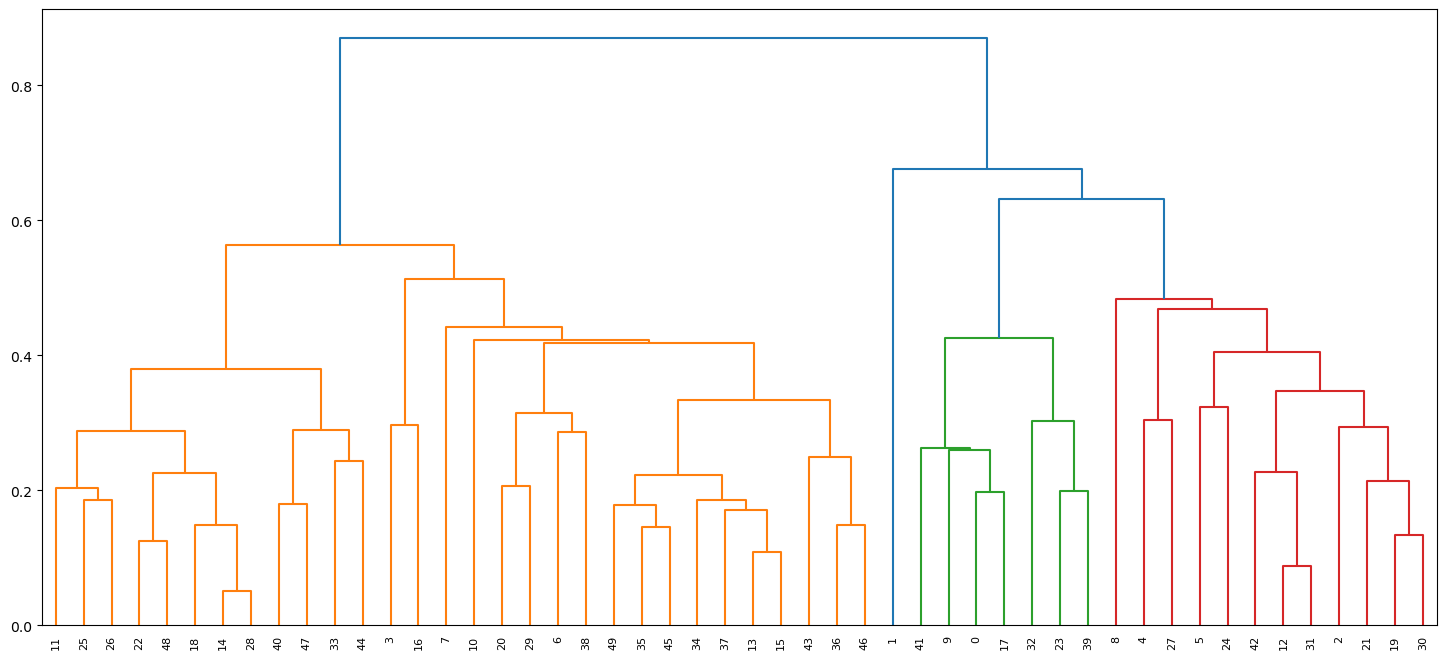

In [10]:
plt.figure(figsize = (18,8))
dendrogram = sch.dendrogram(sch.linkage(df1, method='average'))

In [27]:
hc = AgglomerativeClustering(n_clusters = 6,
                             affinity = 'euclidean',
                             linkage = 'average')

In [28]:
y_hc = hc.fit_predict(df1)
y_hc

array([3, 5, 0, 2, 0, 0, 1, 1, 0, 3, 1, 4, 0, 1, 4, 1, 2, 3, 4, 0, 1, 0,
       4, 3, 0, 4, 4, 0, 4, 1, 0, 0, 3, 4, 1, 1, 1, 1, 1, 3, 4, 3, 0, 1,
       4, 1, 1, 4, 4, 1], dtype=int64)

In [29]:
Clusters = pd.DataFrame(y_hc, columns=['Clusters'])
Clusters

,Clusters
0,3
1,5
2,0
3,2
4,0
5,0
6,1
7,1
8,0
9,3


In [30]:
crime['h_clusterid'] = Clusters

In [31]:
crime.sort_values("h_clusterid")

,region,Murder,Assault,UrbanPop,Rape,h_clusterid
24,Missouri,9.0,178,70,28.2,0
27,Nevada,12.2,252,81,46.0,0
30,New Mexico,11.4,285,70,32.1,0
31,New York,11.1,254,86,26.1,0
12,Illinois,10.4,249,83,24.0,0
19,Maryland,11.3,300,67,27.8,0
8,Florida,15.4,335,80,31.9,0
21,Michigan,12.1,255,74,35.1,0
5,Colorado,7.9,204,78,38.7,0
4,California,9.0,276,91,40.6,0


#k means clustering

In [32]:
from sklearn.cluster import KMeans

In [68]:
Crime=pd.read_csv("crime_data.csv")

In [53]:
from sklearn.metrics import silhouette_score

wcss = []
sil_score = []
cal_haz_score = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
    if i==1:
        continue
        sil_score.append(silhouette_score(df1, kmeans.labels_))

C:\Users\hites\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [54]:
wcss 

[13.184122550256443,
 6.596893867946196,
 5.010878493006417,
 3.6834561535859134,
 3.2250722560447906,
 2.8520398885211113,
 2.5848664114310442,
 2.314201689711636,
 2.125929265181011,
 1.8528270051870226]

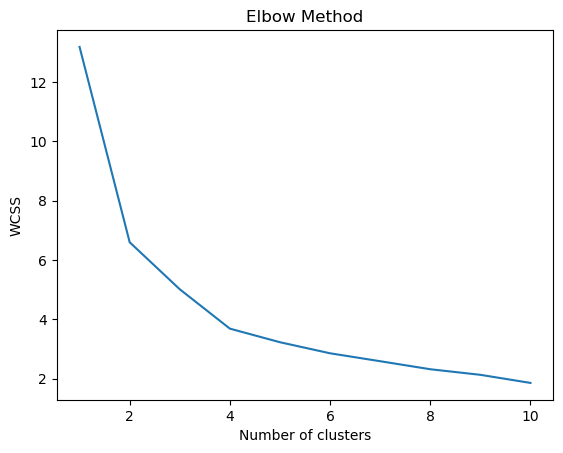

In [56]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [58]:
clusters = KMeans(6, random_state = 42)
clusters.fit(df1)

KMeans(n_clusters=6, random_state=42)

In [62]:
clusters.labels_

array([2, 0, 5, 1, 5, 5, 4, 1, 5, 2, 4, 3, 5, 1, 3, 1, 1, 2, 3, 5, 4, 5,
       4, 2, 1, 3, 4, 5, 3, 4, 5, 5, 2, 3, 1, 1, 1, 4, 4, 2, 3, 2, 5, 4,
       3, 1, 1, 3, 4, 1])

In [70]:
Crime['clusterid_new'] = clusters.labels_
Crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,5
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,5
5,Colorado,7.9,204,78,38.7,5
6,Connecticut,3.3,110,77,11.1,4
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,5
9,Georgia,17.4,211,60,25.8,2


In [71]:
clusters.cluster_centers_

array([[0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.37700803, 0.36957763, 0.56073446, 0.35400517],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388],
       [0.13587684, 0.1065449 , 0.2693032 , 0.09790411],
       [0.21024096, 0.21952055, 0.75762712, 0.21111111],
       [0.6177437 , 0.75031133, 0.798151  , 0.65421658]])

In [72]:
Crime.groupby('clusterid_new').mean()

,Murder,Assault,UrbanPop,Rape
clusterid_new,,,,
0,10.000000,263.000000,48.000000,44.500000
1,7.058333,152.916667,65.083333,21.000000
2,14.671429,251.285714,54.285714,21.685714
3,3.055556,76.111111,47.888889,11.088889
4,4.290000,109.100000,76.700000,15.470000
5,11.054545,264.090909,79.090909,32.618182


In [73]:
Crime['clusterid_new'].value_counts()

1    12
5    11
4    10
3     9
2     7
0     1
Name: clusterid_new, dtype: int64

#DBSCAN

In [96]:
from sklearn.cluster import DBSCAN


In [146]:
crime1=pd.read_csv('crime_data.csv')

In [138]:
dbscan = DBSCAN(eps = 0.28, min_samples = 3)
dbscan.fit(df1)

DBSCAN(eps=0.28, min_samples=3)

In [139]:
dbscan.labels_

array([ 0, -1,  1,  2, -1, -1,  2, -1, -1,  0, -1,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2,  0,  2,  2,  2, -1,  2,  2,  1,  1,  0,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  1,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [140]:
cl = pd.DataFrame(dbscan.labels_, columns = ['cluster'])

In [141]:
cl

,cluster
0,0
1,-1
2,1
3,2
4,-1
5,-1
6,2
7,-1
8,-1
9,0


In [147]:
clustered = pd.concat([crime1, cl], axis = 1)

In [148]:
clustered

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


In [149]:
clustered.sort_values('cluster')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
1,Alaska,10.0,263,48,44.5,-1
27,Nevada,12.2,252,81,46.0,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
10,Hawaii,5.3,46,83,20.2,-1
0,Alabama,13.2,236,58,21.2,0
23,Mississippi,16.1,259,44,17.1,0
39,South Carolina,14.4,279,48,22.5,0
